Back to the main [Index](../index.ipynb)

#### Draw diagram

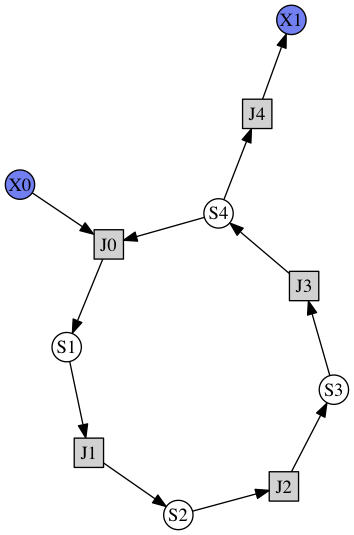

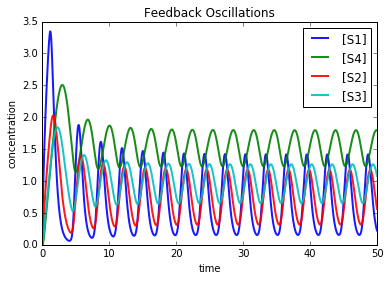

In [1]:
%matplotlib inline
from __future__ import print_function
import tellurium as te

r = te.loada('''
model feedback()
   // Reactions:http://localhost:8888/notebooks/core/tellurium_export.ipynb#
   J0: $X0 -> S1; (VM1 * (X0 - S1/Keq1))/(1 + X0 + S1 +   S4^h);
   J1: S1 -> S2; (10 * S1 - 2 * S2) / (1 + S1 + S2);
   J2: S2 -> S3; (10 * S2 - 2 * S3) / (1 + S2 + S3);
   J3: S3 -> S4; (10 * S3 - 2 * S4) / (1 + S3 + S4);
   J4: S4 -> $X1; (V4 * S4) / (KS4 + S4);

  // Species initializations:
  S1 = 0; S2 = 0; S3 = 0;
  S4 = 0; X0 = 10; X1 = 0;

  // Variable initialization:
  VM1 = 10; Keq1 = 10; h = 10; V4 = 2.5; KS4 = 0.5;
end''')

# simulate using variable step size
r.integrator.setValue('variable_step_size', True)
s = r.simulate(0, 50)
# draw the diagram
r.draw(width=200)
# and the plot
r.plot(s, title="Feedback Oscillations", ylabel="concentration", alpha=0.9);

#### Plotting multiple simulations
All plotting is done via the `r.plot` or `te.plotArray` functions. To plot multiple curves in one figure use the `show=False` setting.

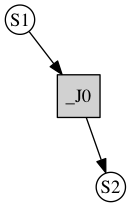

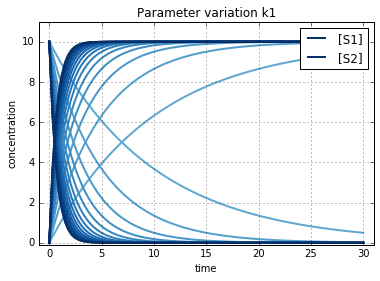

Reference Simulation: k1 = 1.5
Parameter variation: k1 = [ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5]


In [2]:
import tellurium as te
import numpy as np
import matplotlib.pylab as plt

# Load a model and carry out a simulation generating 100 points
r = te.loada ('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
r.draw(width=100)

# get colormap
# Colormap instances are used to convert data values (floats) from the interval [0, 1]
cmap = plt.get_cmap('Blues')

# The legend can be suppressed which is useful for plotting large 
# numbers of curves where a legend would get in the way

k1_values = np.linspace(start=0.1, stop=1.5, num=15)
max_k1 = max(k1_values)
for k, value in enumerate(k1_values):
    r.reset()
    r.k1 = value
    s = r.simulate(0, 30, 100)
    
    color = cmap((value+max_k1)/(2*max_k1))
    # plot curves without legend and showing
    r.plot(s, loc=None, show=False, color=color, linewidth=2.0)

# add legend for last curve, show everything and set labels, titels, ...
r.plot(s, loc='upper right', show=True, color=color, linewidth=2.0,
       title="Parameter variation k1", xlabel="time", ylabel="concentration", 
       xlim=[-1, 31], ylim=[-0.1, 11], grid=True)    

print('Reference Simulation: k1 = {}'.format(r.k1))
print('Parameter variation: k1 = {}'.format(k1_values))

#### Logarithmic axis
The axis scale can be adapted with the `xscale` and `yscale` settings.

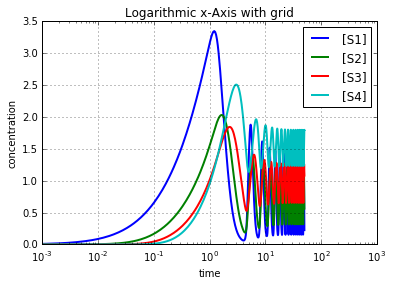

In [3]:
import tellurium as te
r = te.loadTestModel('feedback.xml')
r.integrator.setSetting('variable_step_size', True)
s = r.simulate(0, 50)
r.plot(s, xscale="log", xlim=[10E-4, 10E2], grid=True, 
      title="Logarithmic x-Axis with grid", ylabel="concentration");